# G-quadruplex

In [17]:
import matplotlib.pyplot as plt



def readG4(inpfile):
    res = []
    with open(inpfile) as inp:
        for line in inp:
            if line.startswith("ID"):
                continue
            ls = line.strip().split()
            rmsd = float(ls[2])
            seq  = '.'.join([x.split('.')[2].replace('DG','G') for x in ls[6].split(',')])
            res.append([rmsd,seq])
    return res
            

def BuildG4(inpfile, figsize=(7,5), title=''):

    g4 = readG4(inpfile)
    
    x, ty, fy = [], [], []

    tcnt, fcnt = 0, 0
    N = len(g4)
    sorted_g4 = sorted(g4, key = lambda x: x[0])
    for i in range(N):
    
        if sorted_g4[i][1] == 'G.G.G.G':
            tcnt += 1
        else:
            fcnt += 1
    
        if i < N - 1 and sorted_g4[i][0] == sorted_g4[i+1][0]:
            continue

        x.append(sorted_g4[i][0])
        ty.append(tcnt)
        fy.append(fcnt)

    fig, ax1 = plt.subplots(figsize=figsize)

    color = 'tab:blue'
    ax1.set_title(title, fontsize=18)
    ax1.set_xlabel('RMSD (Å)', fontsize=18)
    ax1.set_ylabel('GGGG', color=color, fontsize=18)
    ax1.plot(x, ty, color=color)
    ax1.tick_params(axis='y', labelcolor=color, labelsize=14)
    ax1.tick_params(axis='x', labelsize=14)

    ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

    color = 'tab:orange'
    ax2.set_ylabel('not GGGG', color=color, fontsize=18)  # we already handled the x-label with ax1
    ax2.plot(x, fy, color=color)
    ax2.tick_params(axis='y', labelcolor=color, labelsize=14)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()
            

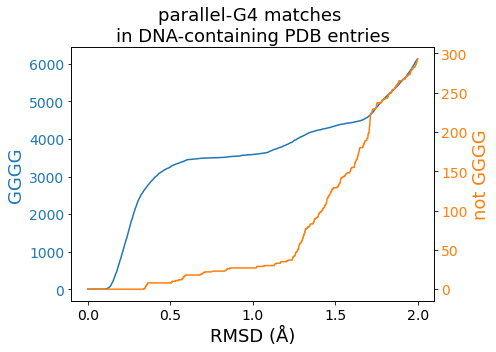

In [18]:
BuildG4("G4_DNA_hits.tsv", title="parallel-G4 matches \nin DNA-containing PDB entries")

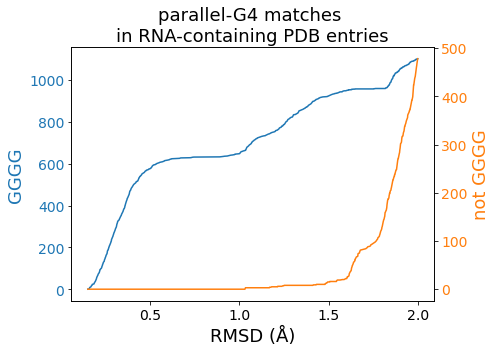

In [19]:
BuildG4("G4_RNA_hits.tsv", title="parallel-G4 matches \nin RNA-containing PDB entries")

# GNRA-tetraloop

In [24]:

def readGNRA(inpfile):
    res = []
    with open(inpfile) as inp:
        for line in inp:
            if line.startswith("ID"):
                continue
            ls = line.strip().split()
            rmsd = float(ls[2])
            seq  = [x.split('.')[2] for x in ls[6].split(',')]
            if seq[1] in ('DG','G') and seq[3] in ('DG','DA','A','G','MA6','A2M') and seq[4] in ('DA','A','MA6','A2M'):
                res.append([rmsd,'GNRA'])
            else:
                res.append([rmsd,'not GNRA'])
    return res
            

def BuildGNRA(inpfile, figsize=(7,5), title=''):

    gnra = readGNRA(inpfile)
    
    x, ty, fy = [], [], []

    tcnt, fcnt = 0, 0
    N = len(gnra)
    sorted_gnra = sorted(gnra, key = lambda x: x[0])
    for i in range(N):
    
        if sorted_gnra[i][1] == 'GNRA':
            tcnt += 1
        else:
            fcnt += 1
    
        if i < N - 1 and sorted_gnra[i][0] == sorted_gnra[i+1][0]:
            continue

        x.append(sorted_gnra[i][0])
        ty.append(tcnt)
        fy.append(fcnt)

    fig, ax1 = plt.subplots(figsize=figsize)

    color = 'tab:blue'
    ax1.set_title(title, fontsize=18)
    ax1.set_xlabel('RMSD (Å)', fontsize=18)
    ax1.set_ylabel('GNRA', color=color, fontsize=18)
    ax1.plot(x, ty, color=color)
    ax1.tick_params(axis='y', labelcolor=color, labelsize=14)
    ax1.tick_params(axis='x', labelsize=14)

    ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

    color = 'tab:orange'
    ax2.set_ylabel('not GNRA', color=color, fontsize=18)  # we already handled the x-label with ax1
    ax2.plot(x, fy, color=color)
    ax2.tick_params(axis='y', labelcolor=color, labelsize=14)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()
            

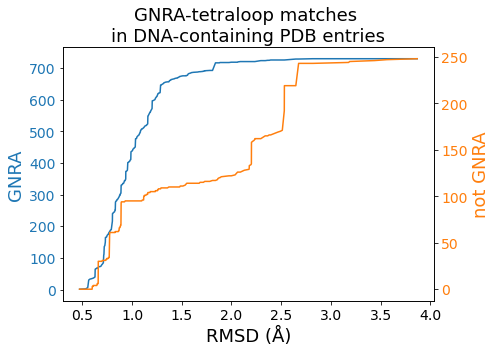

In [25]:
BuildGNRA("GNRA_DNA_hits.tsv", title="GNRA-tetraloop matches \nin DNA-containing PDB entries")

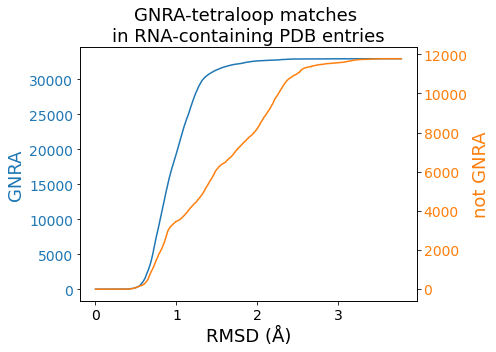

In [26]:
BuildGNRA("GNRA_RNA_hits.tsv", title="GNRA-tetraloop matches \nin RNA-containing PDB entries")

In [ ]:
'''GAAA 5599
GUGA 4183
GCAA 3668
GAGA 2682
GCGA 1786
GAAG 1555
GUAA 1170
UAAC 1081
GACG 454
GGGA 206
GCGG 145
GGAA 137
GGCA 67
GCAG 36
AAAC 13
GACA 11
AGAG 10
GAGC 9
AUUC 8
GAUA 7
UUUC 7
AAGG 6
UAGC 5
AAAA 5
GAGG 4
AUUU 4
ACAA 3
UAAA 3
CAAA 3
AAUA 3
GAAU 3
UUUU 2
UCGU 2
AGCC 2
UAAU 2
CACC 2
GUAG 1
AGGA 1
CUGC 1
GAGU 1
AGUC 1
GUGC 1
UCAA 1'''